<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
penguim = sns.load_dataset('penguins')

In [8]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

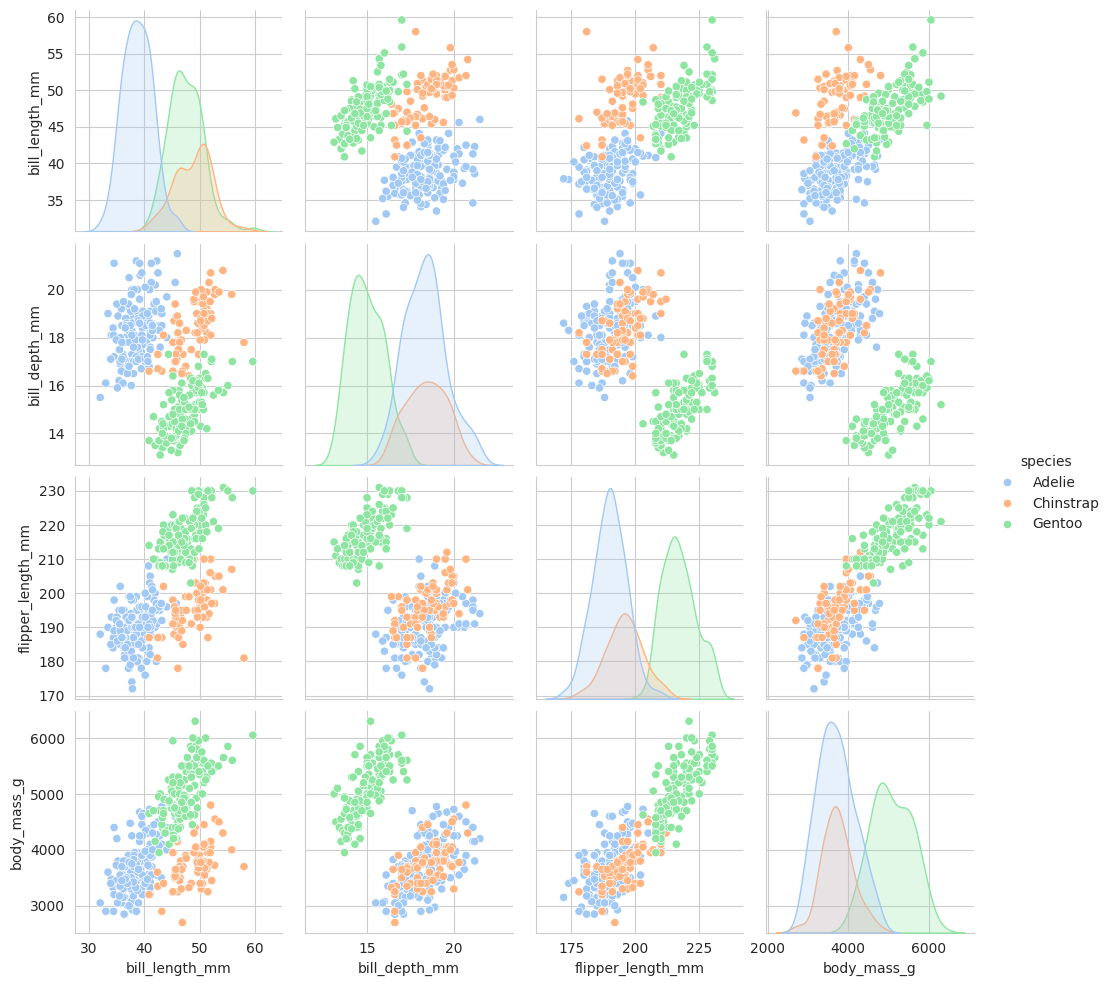

In [9]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue='species', palette='pastel')

**Comentário:**

Este é um pair plot (gráfico de pares), que mostra a relação entre diferentes variáveis numéricas para três espécies de pinguins (Adelie, Chinstrap e Gentoo).

- A espécie Gentoo (verde) possuem maior massa corporal, nadadeiras mais longas e bicos mais compridos, tornando-os facilmente diferenciáveis e identificáveis;
- Adelie (azul) e Chinstrap (laranja) são mais semelhantes, mas podem ser diferenciados pela profundidade do bico;
- Existe uma forte correlação entre massa corporal e comprimento da nadadeira, o que pode indicar que pinguins maiores possuem estruturas corporais adaptadas para natação.



 - Sexo por espécie:

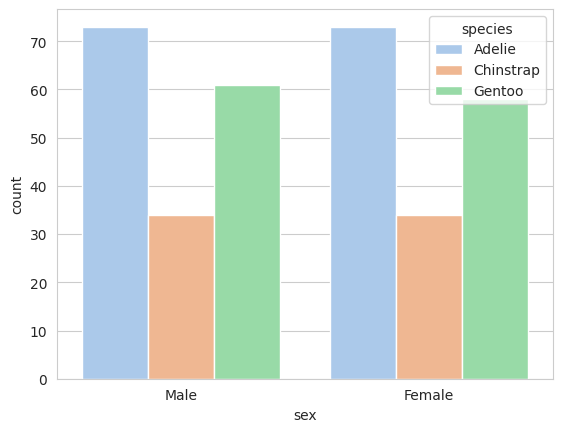

In [10]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue='species', palette='pastel')

**Comentário:**

Este gráfico é um gráfico de barras empilhadas que representa a contagem de pinguins de diferentes espécies (Adelie, Chinstrap e Gentoo) divididos por sexo (Masculino e Feminino).

- A espécie Adelie (barras azuis) é a dominante, com a maior contagem tanto para machos quanto para fêmeas, com números próximos ou iguais;
- A espécie Gentoo (barras verdes) vem logo em seguida, com números próximos ou iguais entre os sexos;
- A espécie Chinstrap (barras laranja) é a com menor representação, com a menor contagem entre as três espécies, com números próximos ou iguais entre os sexos;

 - Ilha por espécie:

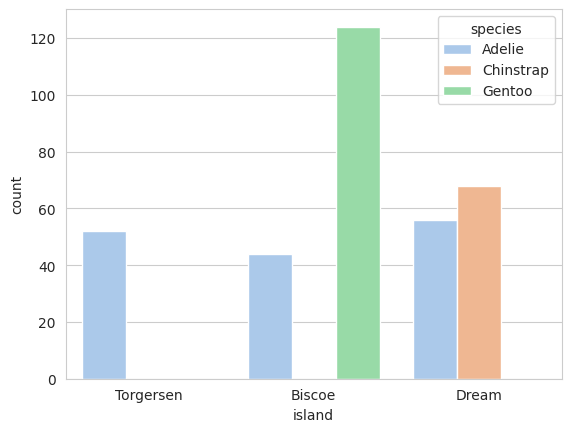

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue='species', palette='pastel')

**Comentário:**

Este gráfico de barras empilhadas exibe a contagem de pinguins de três espécies (Adelie, Chinstrap e Gentoo) distribuídos por ilha (Torgersen, Biscoe e Dream).

- Ilha Torgersen: possui apenas a espécie Adelie (azul) está presente, com uma contagem próxima a 50 animais;
- Ilha Biscoe: possui a espécie Gentoo (verde) com a maior presença, algo por volta de 120 animais, porém tambpem possui a espécie Adelia, porém em menor quantidade, aproximadamente 40 animais;
- Ilha Dream: possui a espécie Chinstrap (laranja), com uma presença um pouco maior, aproxiamdamente 70 animais, seguida pela espécie Adelie, com uma contagem de aproximadamente 60 animais;
- Cada ilha parece ser dominada por uma ou duas espécies específicas; sendo a Gentoo exclusiva da ilha Biscoe,  Chinstrap da ilha Dream e Adelie está presente em todas as ilhas, sendo sua maior concentração na Dream.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [12]:
# resposta da questão 2.1

# Verificando informações básicas do dataset
print(penguim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [13]:
# Verificando valores faltantes
print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [14]:
# Preencher colunas numéricas com a média
penguim.fillna(penguim.select_dtypes(include=['number']).mean(), inplace=True)

print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [15]:
# resposta da questão 2.2

# Identificar variáveis categóricas
categorical_cols = penguim.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['species', 'island', 'sex'], dtype='object')


In [16]:
penguim[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,Female


In [17]:
penguim['sex_m'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else (0 if pd.notna(sex) else None))
penguim['sex_f'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else (0 if pd.notna(sex) else None))

print(penguim)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        39.10000       18.70000         181.000000   
1    Adelie  Torgersen        39.50000       17.40000         186.000000   
2    Adelie  Torgersen        40.30000       18.00000         195.000000   
3    Adelie  Torgersen        43.92193       17.15117         200.915205   
4    Adelie  Torgersen        36.70000       19.30000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe        43.92193       17.15117         200.915205   
340  Gentoo     Biscoe        46.80000       14.30000         215.000000   
341  Gentoo     Biscoe        50.40000       15.70000         222.000000   
342  Gentoo     Biscoe        45.20000       14.80000         212.000000   
343  Gentoo     Biscoe        49.90000       16.10000         213.000000   

     body_mass_g     sex  sex_m  sex_f  
0    3750.000000    Male    1.0    0.0  
1    

In [18]:
nominal_cols = ['species', 'island']
ordinal_cols = ['sex']

In [21]:
# Aplicar One-Hot Encoding para variáveis nominais
for col in nominal_cols:
  dummies = pd.get_dummies(penguim[col], prefix=col + '_nom', dummy_na=True)  # Inclui NaN como categoria
  penguim = pd.concat([penguim, dummies], axis=1)

# Visualizar as primeiras linhas
print(penguim.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  sex_m  sex_f  species_nom_Adelie  ...  \
0  3750.000000    Male    1.0    0.0                True  ...   
1  3800.000000  Female    0.0    1.0                True  ...   
2  3250.000000  Female    0.0    1.0                True  ...   
3  4201.754386     NaN    NaN    NaN                True  ...   
4  3450.000000  Female    0.0    1.0                True  ...   

   island_nom_Dream  island_nom_Torgersen  species_nom_Adelie  \
0             False                  True                True   
1             False               

### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [23]:
# resposta da questão 2.3

# Identificar a variável resposta
response_col = 'species'

# Manter a coluna de resposta antes de remover as outras colunas categóricas
penguim_cleaned = penguim.drop(columns=['island', 'sex'])

# Garantir que a variável resposta seja a primeira coluna
cols = [response_col] + [col for col in penguim_cleaned.columns if col != response_col]
penguim_cleaned = penguim_cleaned[cols]

# Visualizar as primeiras linhas
print(penguim_cleaned.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie        39.10000       18.70000         181.000000  3750.000000   
1  Adelie        39.50000       17.40000         186.000000  3800.000000   
2  Adelie        40.30000       18.00000         195.000000  3250.000000   
3  Adelie        43.92193       17.15117         200.915205  4201.754386   
4  Adelie        36.70000       19.30000         193.000000  3450.000000   

   sex_m  sex_f  species_nom_Adelie  species_nom_Adelie  species_nom_Adelie  \
0    1.0    0.0                True                True                True   
1    0.0    1.0                True                True                True   
2    0.0    1.0                True                True                True   
3    NaN    NaN                True                True                True   
4    0.0    1.0                True                True                True   

   ...  island_nom_Biscoe  island_nom_Biscoe  island_nom_Biscoe  \
0

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [24]:
# resposta da questão 2.4

# Separar a variável resposta (target) e as variáveis explicativas
X = penguim_cleaned.drop(columns=['species'])  #Features
y = penguim_cleaned['species']  #Target

# Separar em treino (2/3) e teste (1/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)

# Visualizar o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')

Tamanho do conjunto de treino: 229 amostras
Tamanho do conjunto de teste: 115 amostras


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:**

O número de folhas na árvore treinada é: 3

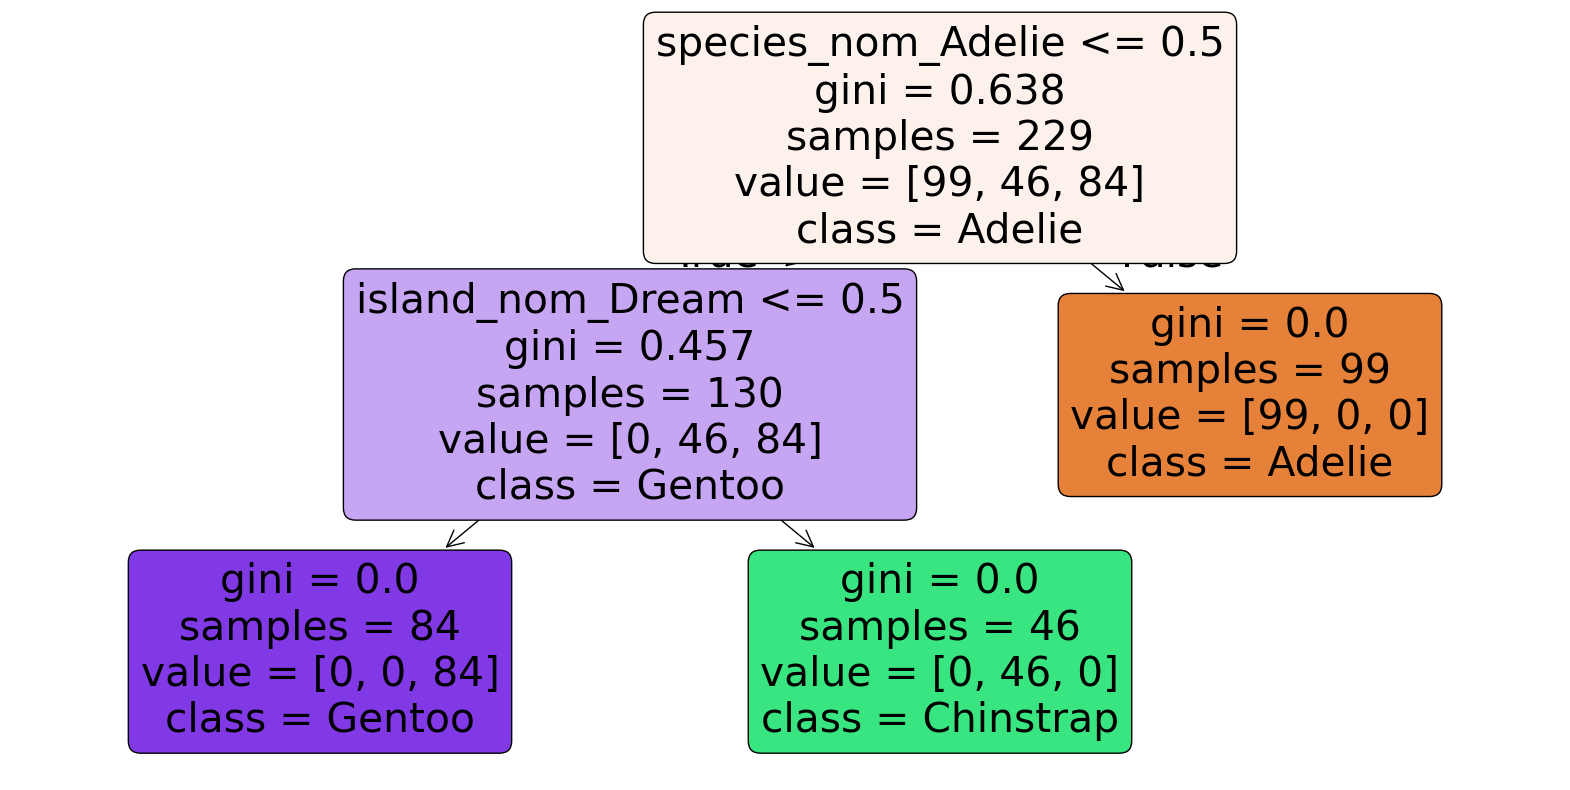

O número de folhas na árvore treinada é: 3


In [27]:
# resposta da questão 3.1

# Treinar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)

# Gerar o gráfico da árvore
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.show()

# Contar o número de folhas
n_leaves = model.get_n_leaves()
print(f'O número de folhas na árvore treinada é: {n_leaves}')

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:**

- Diagonal Principal: Mostra o número de previsões corretas para cada classe. Dessa forma, temos 100% na classificação.

- Fora da Diagonal: Mostra os erros de classificação.

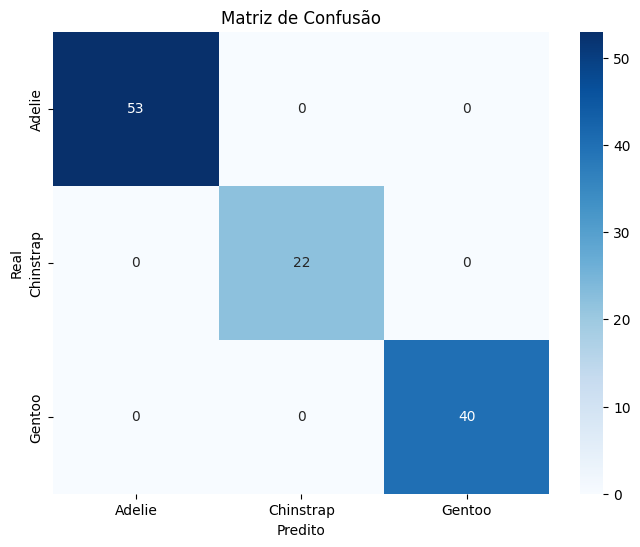

In [28]:
# resposta da questão 3.2.a

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [29]:
# resposta da questão 3.2.b

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 100.00%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [31]:
# resposta da questão 4.1

# Dados do pinguim
penguim_novo = pd.DataFrame({
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'body_mass_g': [3950.0],
    'sex': ['Male']
})

# Pré-processamento
# 1.Codificar variáveis categóricas
penguim_novo['sex_m'] = penguim_novo['sex'].apply(lambda sex: 1 if sex == 'Male' else (0 if pd.notna(sex) else None))
penguim_novo['sex_f'] = penguim_novo['sex'].apply(lambda sex: 1 if sex == 'Female' else (0 if pd.notna(sex) else None))

# 2.Aplicar one-hot encoding para 'island'
island_dummies = pd.get_dummies(penguim_novo['island'], prefix='island_nom', dummy_na=True)
penguim_novo = pd.concat([penguim_novo, island_dummies], axis=1)

# 3.Remover colunas categóricas originais
penguim_novo_cleaned = penguim_novo.drop(columns=['island', 'sex'])

# 4.Garantir a mesma ordem de colunas usada no treino
for col in X_train.columns:
    if col not in penguim_novo_cleaned.columns:
        penguim_novo_cleaned[col] = 0

penguim_novo_cleaned = penguim_novo_cleaned[X_train.columns]

# Fazer a previsão
especie_predita = model.predict(penguim_novo_cleaned)
print(f'Espécie predita: {especie_predita[0]}')

Espécie predita: Gentoo


In [34]:
# Usando array

# Verificar as colunas usadas no treino
print('Colunas usadas no treino:', X_train.columns)

# Dados do pinguim (apenas as colunas relevantes)
penguim_data = {
    'bill_length_mm': 38.2,
    'bill_depth_mm': 18.1,
    'flipper_length_mm': 185.0,
    'body_mass_g': 3950.0,
    'sex_m': 1,
    'sex_f': 0,
    'island_nom_Biscoe': 1,
    'island_nom_Dream': 0,
    'island_nom_Torgersen': 0,
    'island_nom_nan': 0
}

# Criar um array com todas as colunas usadas no treino, inicializar todas as colunas com 0
penguim_array = np.zeros((1, len(X_train.columns)))

# Preencher as colunas relevantes com os dados do pinguim
for col, value in penguim_data.items():
    if col in X_train.columns:
        penguim_array[0, X_train.columns.get_loc(col)] = value

# Fazer a previsão
especie_predita = model.predict(penguim_array)
print(f'Espécie predita: {especie_predita[0]}')

Colunas usadas no treino: Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex_m', 'sex_f', 'species_nom_Adelie', 'species_nom_Adelie',
       'species_nom_Adelie', 'species_nom_Chinstrap', 'species_nom_Chinstrap',
       'species_nom_Chinstrap', 'species_nom_Gentoo', 'species_nom_Gentoo',
       'species_nom_Gentoo', 'island_nom_Biscoe', 'island_nom_Biscoe',
       'island_nom_Biscoe', 'island_nom_Dream', 'island_nom_Dream',
       'island_nom_Dream', 'island_nom_Torgersen', 'island_nom_Torgersen',
       'island_nom_Torgersen', 'species_nom_Adelie', 'species_nom_Adelie',
       'species_nom_Adelie', 'species_nom_Chinstrap', 'species_nom_Chinstrap',
       'species_nom_Chinstrap', 'species_nom_Gentoo', 'species_nom_Gentoo',
       'species_nom_Gentoo', 'island_nom_Biscoe', 'island_nom_Biscoe',
       'island_nom_Biscoe', 'island_nom_Dream', 'island_nom_Dream',
       'island_nom_Dream', 'island_nom_Torgersen', 'island_nom_Torgersen',
       'island

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---